In [ ]:
#Lab 12: Modeling
#Liz Ponting

In [1]:
import pandas as pd

In [2]:
flights = pd.read_csv(r'C:\Users\Liz Ponting\Desktop\flights_python.csv')

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [4]:
import matplotlib.pyplot as plt

In [5]:
import sklearn

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
cat_cols_flights = flights[['carrier','origin','dest']]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(cat_cols_flights)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [9]:
cat_cols_1hot=encoder.transform(cat_cols_flights)
cat_cols_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
cat_cols_1hot_df = pd.DataFrame(cat_cols_1hot,columns=encoder.get_feature_names())
cat_cols_1hot_df

,x0_9E,x0_AA,x0_AS,x0_B6,x0_DL,x0_EV,x0_F9,x0_FL,x0_HA,x0_MQ,...,x2_SNA,x2_SRQ,x2_STL,x2_STT,x2_SYR,x2_TPA,x2_TUL,x2_TVC,x2_TYS,x2_XNA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
336773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
newflights = pd.concat([flights.drop(['carrier','origin','dest'],axis=1),cat_cols_1hot_df],axis=1)

In [12]:
newflights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,x2_SNA,x2_SRQ,x2_STL,x2_STT,x2_SYR,x2_TPA,x2_TUL,x2_TVC,x2_TYS,x2_XNA
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
pd.DataFrame(newflights).fillna(0)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,x2_SNA,x2_SRQ,x2_STL,x2_STT,x2_SYR,x2_TPA,x2_TUL,x2_TVC,x2_TYS,x2_XNA
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,0.0,1455,0.0,0.0,1634,0.0,3393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336772,2013,9,30,0.0,2200,0.0,0.0,2312,0.0,3525,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
336773,2013,9,30,0.0,1210,0.0,0.0,1330,0.0,3461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336774,2013,9,30,0.0,1159,0.0,0.0,1344,0.0,3572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
for col in newflights.columns: 
    print(col) 

year
month
day
dep_time
sched_dep_time
dep_delay
arr_time
sched_arr_time
arr_delay
flight
tailnum
air_time
distance
hour
minute
time_hour
x0_9E
x0_AA
x0_AS
x0_B6
x0_DL
x0_EV
x0_F9
x0_FL
x0_HA
x0_MQ
x0_OO
x0_UA
x0_US
x0_VX
x0_WN
x0_YV
x1_EWR
x1_JFK
x1_LGA
x2_ABQ
x2_ACK
x2_ALB
x2_ANC
x2_ATL
x2_AUS
x2_AVL
x2_BDL
x2_BGR
x2_BHM
x2_BNA
x2_BOS
x2_BQN
x2_BTV
x2_BUF
x2_BUR
x2_BWI
x2_BZN
x2_CAE
x2_CAK
x2_CHO
x2_CHS
x2_CLE
x2_CLT
x2_CMH
x2_CRW
x2_CVG
x2_DAY
x2_DCA
x2_DEN
x2_DFW
x2_DSM
x2_DTW
x2_EGE
x2_EYW
x2_FLL
x2_GRR
x2_GSO
x2_GSP
x2_HDN
x2_HNL
x2_HOU
x2_IAD
x2_IAH
x2_ILM
x2_IND
x2_JAC
x2_JAX
x2_LAS
x2_LAX
x2_LEX
x2_LGA
x2_LGB
x2_MCI
x2_MCO
x2_MDW
x2_MEM
x2_MHT
x2_MIA
x2_MKE
x2_MSN
x2_MSP
x2_MSY
x2_MTJ
x2_MVY
x2_MYR
x2_OAK
x2_OKC
x2_OMA
x2_ORD
x2_ORF
x2_PBI
x2_PDX
x2_PHL
x2_PHX
x2_PIT
x2_PSE
x2_PSP
x2_PVD
x2_PWM
x2_RDU
x2_RIC
x2_ROC
x2_RSW
x2_SAN
x2_SAT
x2_SAV
x2_SBN
x2_SDF
x2_SEA
x2_SFO
x2_SJC
x2_SJU
x2_SLC
x2_SMF
x2_SNA
x2_SRQ
x2_STL
x2_STT
x2_SYR
x2_TPA
x2_TUL
x2_TVC
x2_TYS
x2_XNA


In [105]:
y = newflights['dep_delay']
y.head()

0    2.0
1    4.0
2    2.0
3   -1.0
4   -6.0
Name: dep_delay, dtype: float64

In [106]:
X=newflights[['sched_dep_time','x0_9E','x0_AA','x0_AS','x0_B6','x0_DL','x0_EV','x0_F9','x0_FL','x0_HA','x0_MQ','x0_OO','x0_UA','x0_US','x0_VX','x0_WN','x0_YV']]
X.head()

,sched_dep_time,x0_9E,x0_AA,x0_AS,x0_B6,x0_DL,x0_EV,x0_F9,x0_FL,x0_HA,x0_MQ,x0_OO,x0_UA,x0_US,x0_VX,x0_WN,x0_YV
0,515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,600,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# split the data before visualizing 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=5649)

In [108]:
Xtest.fillna(Xtest.mean())
Xtrain.fillna(Xtrain.mean())
ytrain.fillna(ytrain.mean())
ytest.fillna(ytest.mean())

142285    -1.0
136827    -4.0
88480     12.0
165462    -3.0
93477     -7.0
          ... 
145675    -4.0
15085     -6.0
194700    -5.0
252544    -4.0
185636    34.0
Name: dep_delay, Length: 84194, dtype: float64

In [112]:
ytrain.head()

259002    -1.0
122708    -6.0
312016    -3.0
28815    -12.0
305565    11.0
Name: dep_delay, dtype: float64

In [113]:
ytest.head()

142285    -1.0
136827    -4.0
88480     12.0
165462    -3.0
93477     -7.0
Name: dep_delay, dtype: float64

In [114]:
Xtrain.head()

,sched_dep_time,x0_9E,x0_AA,x0_AS,x0_B6,x0_DL,x0_EV,x0_F9,x0_FL,x0_HA,x0_MQ,x0_OO,x0_UA,x0_US,x0_VX,x0_WN,x0_YV
259002,1055,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122708,800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
312016,835,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28815,1930,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305565,2100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
Xtest.head()

,sched_dep_time,x0_9E,x0_AA,x0_AS,x0_B6,x0_DL,x0_EV,x0_F9,x0_FL,x0_HA,x0_MQ,x0_OO,x0_UA,x0_US,x0_VX,x0_WN,x0_YV
142285,1525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136827,1603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88480,1310,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165462,1200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93477,611,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
Xtrain.shape

(252582, 17)

In [117]:
Xtest.shape

(84194, 17)

In [118]:
ytrain.shape

(252582,)

In [119]:
ytest.shape

(84194,)

C:\Users\Liz Ponting\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Liz Ponting\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.12999e+05, 1.36030e+04, 1.67500e+03, 1.83000e+02, 2.30000e+01,
        1.20000e+01, 1.70000e+01, 6.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([ -43. ,   91.4,  225.8,  360.2,  494.6,  629. ,  763.4,  897.8,
        1032.2, 1166.6, 1301. ]),
 <a list of 10 Patch objects>)

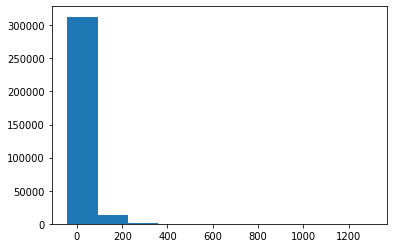

In [120]:
plt.hist('dep_delay',data=flights)

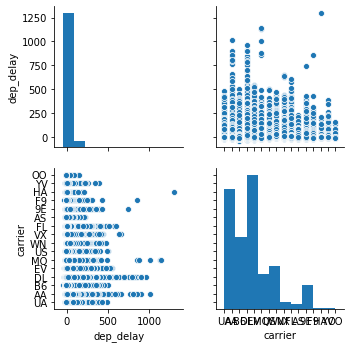

In [121]:
sns.pairplot(flights, vars=['dep_delay','carrier'])

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
model.fit(Xtrain,ytrain)
model 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.score(Xtest,ytest)

In [ ]:
predicted = model.predict(Xunseen)